<a href="https://colab.research.google.com/github/dqniellew1/DLPT/blob/master/dlpt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
a = 3
b = 4
c = (a**2 + b**2) ** 0.5
c

5.0

Eager mode; defining function before knowing what the inputs are

In [0]:
p = lambda a, b: (a**2 + b**2) ** 0.5
p(1,2)

2.23606797749979

In [0]:
p(3,4)

5.0

In [0]:
from torchvision import models

In [0]:
dir(models)

In [0]:
alexnet = models.AlexNet()

In [4]:
resnet = models.resnet101(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


In [5]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [0]:
from torchvision import transforms
preprocess = transforms.Compose([
                                transforms.Resize(256), # scale image
                                transforms.CenterCrop(224), # crop image
                                transforms.ToTensor(), 
                                transforms.Normalize(
                                    mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225]
                                )])

In [0]:
from PIL import Image
from urllib.request import urlopen

url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcR2Oc5BYZ31U5ybkGh-os0vYp2imcS22alOhla6Kj3YDcQ-6vyj&usqp=CAU'
img = Image.open(urlopen(url))

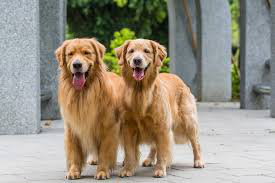

In [38]:
img

In [0]:
img_t = preprocess(img)

In [0]:
import torch
batch_t = torch.unsqueeze(img_t, 0)

In [41]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [42]:
out = resnet(batch_t); out

tensor([[-9.1098e-02, -1.2886e+00, -2.1203e+00, -2.7794e+00, -3.3039e+00,
         -9.3184e-01, -4.4989e+00, -1.7128e+00, -6.3770e-01, -2.5667e+00,
          7.8734e-01, -9.3606e-01, -3.4363e-01, -2.4164e+00, -1.1723e+00,
         -2.9113e+00, -9.4614e-01, -1.9518e+00, -2.7303e+00, -2.3562e+00,
         -2.9212e+00, -1.8033e-01, -1.4277e+00, -3.0118e-01, -1.9011e+00,
         -1.2803e+00, -3.7288e-01, -1.3338e+00, -6.9560e-01, -1.6065e+00,
         -2.5707e+00, -2.8611e+00, -5.2471e-01, -1.8508e+00, -1.8877e+00,
         -2.2376e+00, -1.5868e+00, -3.0398e+00,  1.0487e-01, -1.4300e+00,
         -8.1510e-01,  4.4980e-01, -5.5079e-01, -6.1254e-01, -5.5228e-01,
         -1.9789e+00, -1.1676e+00, -2.8450e-01, -2.3160e+00, -1.6372e+00,
         -4.4192e+00,  2.3626e-01,  2.3343e-01, -2.0777e-01, -2.5552e+00,
         -2.4534e+00, -2.4844e+00, -1.0897e+00, -3.6758e+00,  2.8694e-01,
         -3.0557e-01, -2.6704e+00,  5.5140e-01, -3.7524e-01, -8.5834e-01,
         -1.4377e+00, -5.8974e-01, -1.

In [24]:
!git clone https://github.com/deep-learning-with-pytorch/dlwpt-code.git

Cloning into 'dlwpt-code'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 571 (delta 27), reused 70 (delta 19), pack-reused 479
Receiving objects: 100% (571/571), 174.21 MiB | 12.91 MiB/s, done.
Resolving deltas: 100% (206/206), done.
Checking out files: 100% (220/220), done.


In [0]:
with open('dlwpt-code/data/p1ch2/imagenet_classes.txt') as f:
  labels = [line.strip() for line in f.readlines()]

In [0]:
_, index = torch.max(out, 1)

In [44]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('golden retriever', 40.3233642578125)

In [52]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('golden retriever', 40.3233642578125),
 ('Sussex spaniel', 14.376751899719238),
 ('Tibetan terrier, chrysanthemum dog', 5.0105814933776855),
 ('Norfolk terrier', 4.13256311416626),
 ('Tibetan mastiff', 3.800274133682251)]

In [60]:
indices[0][:5]

torch.Size([5])

In [63]:
netG = ResNetGenerator()

NameError: ignored

In [0]:
model_path = 'dlwpt-code/data/p1ch2/horse2zebra_0.4.0.pth'
model_data = torch.load(model_path)


In [70]:
from torch import hub

resnet18_model = hub.load('pytorch/vision:master',
                          'resnet18',
                          pretrained=True)

Using cache found in /root/.cache/torch/hub/pytorch_vision_master
